In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import pandas as pd
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing Datasets
olist_customer_df = pd.read_csv('olist_customers_dataset.csv')
olist_sellers_df = pd.read_csv('olist_sellers_dataset.csv')
olist_geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
olist_orders_df = pd.read_csv('olist_orders_dataset.csv')
olist_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
olist_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
olist_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
olist_products_df = pd.read_csv('olist_products_dataset.csv')
olist_translation_df = pd.read_csv('product_category_name_translation.csv')
Streaming_DataSet = pd.read_csv(r'C:\Project\Streaming_Dataset.csv')

In [5]:
#Statewise orders count
olist_geolocation_df.geolocation_state.value_counts()

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64

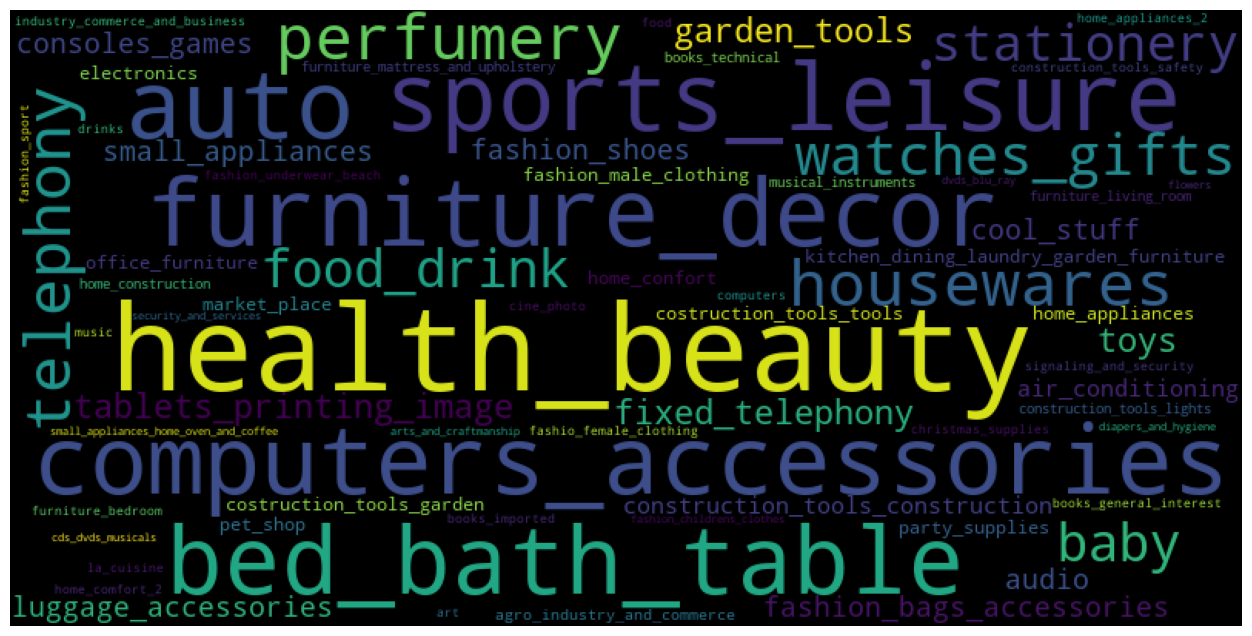

In [32]:
words = ' '.join((i for i in olist_translation_df.product_category_name_english.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

#### `WordCloud` has show us all `74` cateogery names and highlighting **health_beauty** means it has most number of products.

In [8]:
#1- How many types of payment methods has been used for shopping and who got the highest percentage?
payment_types_df = olist_payments_df.payment_type.value_counts().to_frame().reset_index()
payment_types_df['Percentage'] = round(payment_types_df.payment_type *100/payment_types_df.payment_type.sum(),2)
payment_types_df

index  payment_type  Percentage
0  credit_card         76795       73.92
1       boleto         19784       19.04
2      voucher          5775        5.56
3   debit_card          1529        1.47
4  not_defined             3        0.00

#### There are 5 types of method used for shopping and credit_card has been used 76795 times over the course of 2 years sharing 73.92% among other types of payment.

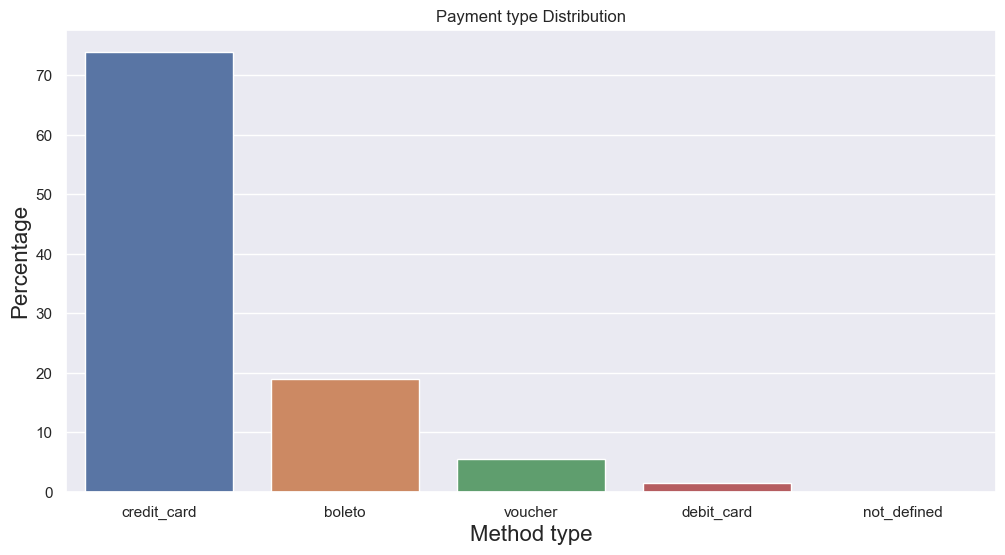

In [9]:
#
plt.figure(figsize=(12, 6))
sns.set(font_scale=20)
sns.set_theme(style="darkgrid")
sns.barplot(x='index',y='Percentage',data=payment_types_df);

plt.title('Payment type Distribution');
plt.xlabel('Method type', fontsize=16);
plt.ylabel('Percentage', fontsize=16);


* There are 5 types of method used for shopping and credit_card has been used 76795 times over the course of 2 years sharing 73.92% among other types of payment.

* Boleto is bank wallet type of mode and we can say that olist provides better voucher payments as it has got more amount of share than debit card

In [10]:
category_name = olist_products_df.product_category_name.value_counts().to_frame()
category_name_df1 = category_name[:15]

In [11]:
fig = px.histogram(data_frame=category_name_df1,
           x='product_category_name',y= category_name_df1.index)

fig.update_layout(title="Top 15 types of category",
                    xaxis_title="Product count",
                    yaxis_title="Category Name",
                    plot_bgcolor='#000000',
    font=dict(
        family="Times New Roman",
        size=14,
        color="#8B0000"
    )
                 )
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.show()

Above graph shows **top 15** category types and we can visualize from the graph `cama_mesa_banho` which means `bed_bath_table` has got the most amount of products touching around 3000 different types of products in it.

In [12]:
category_name_df2 = category_name[-15:]
fig = px.histogram(data_frame=category_name_df2,
           x='product_category_name',y= category_name_df2.index)

fig.update_layout(title="Bottom 15 types of category",
                    xaxis_title="Product count",
                    yaxis_title="Category Name",
                    plot_bgcolor='#000000',
    font=dict(
        family="Times New Roman",
        size=14,
        color="#8B0000"
    )
                 )
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)
fig.show()

Here we are looking at least 15 and we can visulize that **cds_dvds_musicals (CD and DVDs)** category got just one product in it, which leads to a conclusion that it is not for music enthusiasts.

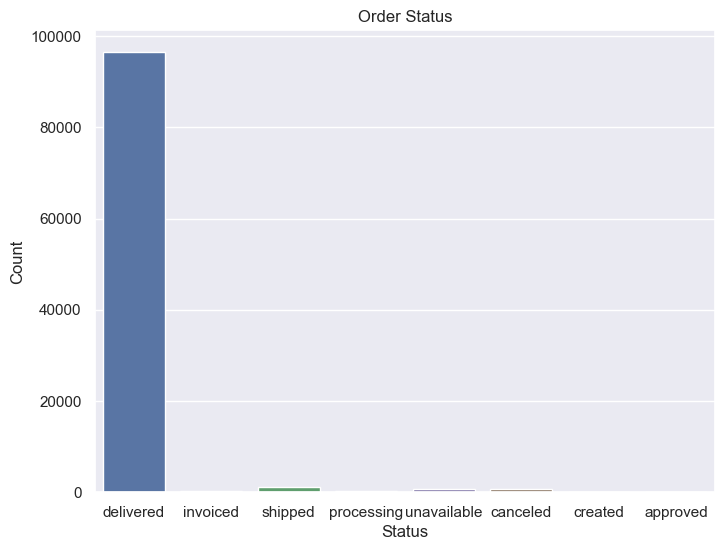

In [13]:
# Whats is the status of orders around the course of 2 years?
# Visualize the order status
plt.figure(figsize=(8, 6))
sns.countplot(data=olist_orders_df, x='order_status')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [17]:
'''grouped_data = []
for order_id, group in Streaming_DataSet.groupby("order_id"):
    order_items = []
    for _, row in group.iterrows():
        order_items.append({
            "order_item_id": row["order_item_id"],
            "product_id": row["product_id"],
            "seller_id": row["seller_id"],
            "price": row["price"],
            "freight_value": row["freight_value"]
        })

    grouped_data.append({
        "order_id": order_id,
    })

gr = pd.DataFrame(grouped_data)

Streaming_DataSet1 = Streaming_DataSet.drop(columns=["order_item_id", "product_id", "seller_id", "price", "freight_value"])
Streaming_DataSet1 = Streaming_DataSet1.drop_duplicates()
fdata = pd.merge(Streaming_DataSet1, gr, on='order_id', how='inner')
'''

'grouped_data = []\nfor order_id, group in Streaming_DataSet.groupby("order_id"):\n    order_items = []\n    for _, row in group.iterrows():\n        order_items.append({\n            "order_item_id": row["order_item_id"],\n            "product_id": row["product_id"],\n            "seller_id": row["seller_id"],\n            "price": row["price"],\n            "freight_value": row["freight_value"]\n        })\n\n    grouped_data.append({\n        "order_id": order_id,\n    })\n\ngr = pd.DataFrame(grouped_data)\n\nStreaming_DataSet1 = Streaming_DataSet.drop(columns=["order_item_id", "product_id", "seller_id", "price", "freight_value"])\nStreaming_DataSet1 = Streaming_DataSet1.drop_duplicates()\nfdata = pd.merge(Streaming_DataSet1, gr, on=\'order_id\', how=\'inner\')\n'

In [18]:
# Calculate basic summary statistics for numerical columns
print(fdata.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


In [19]:
Streaming_DataSet.describe()

customer_zip_code_prefix  order_item_id          price  freight_value
count             113425.000000  112650.000000  112650.000000  112650.000000
mean               35102.472965       1.197834     120.653739      19.990320
std                29864.919733       0.705124     183.633928      15.806405
min                 1003.000000       1.000000       0.850000       0.000000
25%                11250.000000       1.000000      39.900000      13.080000
50%                24320.000000       1.000000      74.990000      16.260000
75%                59020.000000       1.000000     134.900000      21.150000
max                99990.000000      21.000000    6735.000000     409.680000

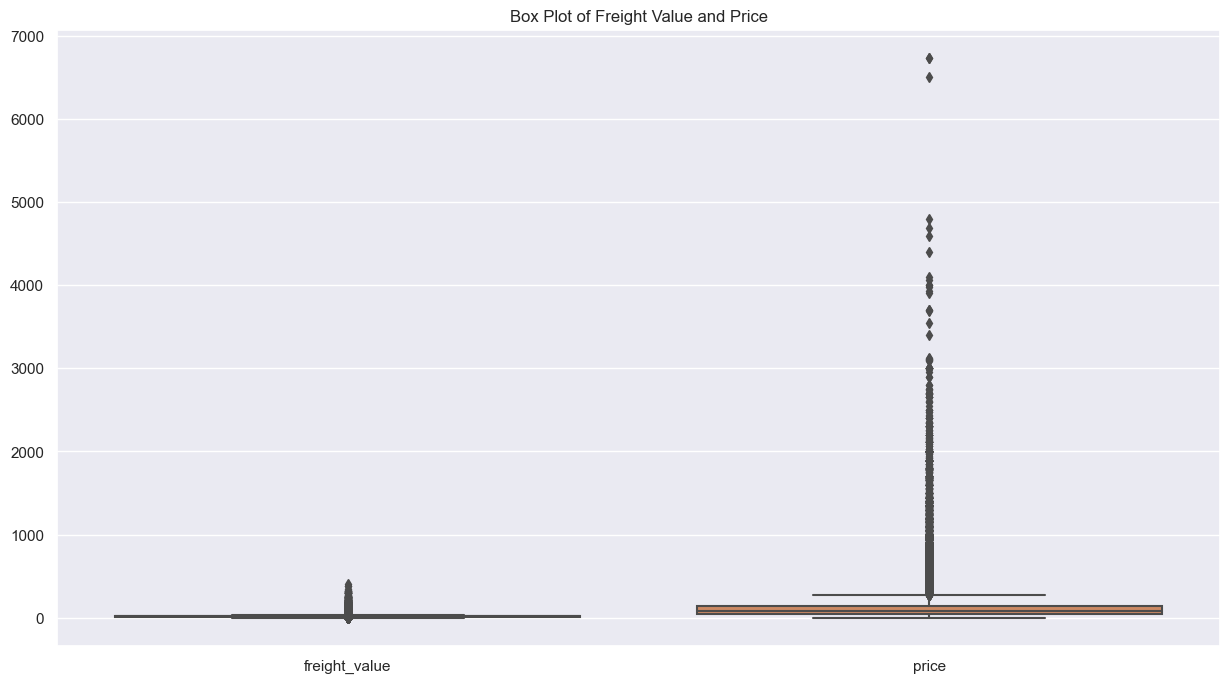

In [21]:
# Box plot to identify outliers in numeric columns
plt.figure(figsize=(15, 8))
sns.boxplot(data=Streaming_DataSet[['freight_value', 'price']])
plt.title('Box Plot of Freight Value and Price')
plt.show()

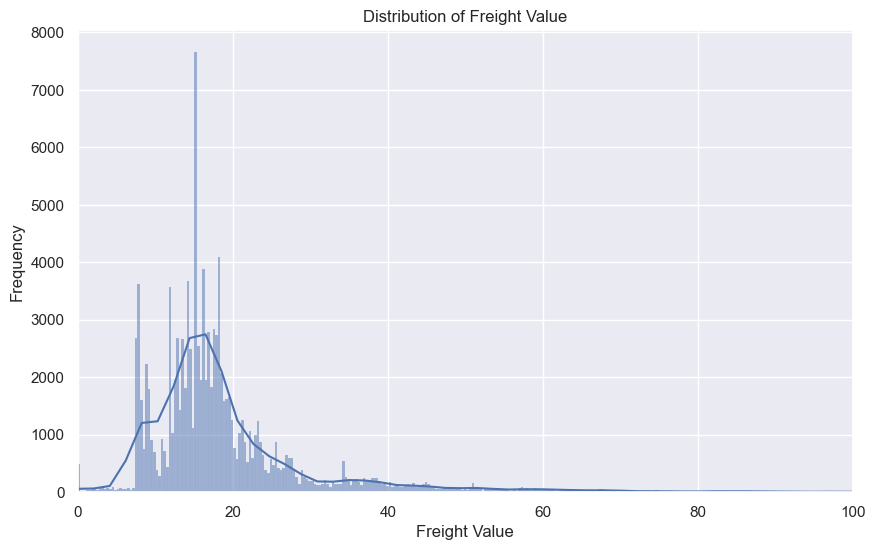

In [22]:
# Visualize the distribution of freight_value
#Kernel Density Estimation
plt.figure(figsize=(10, 6))
sns.histplot(Streaming_DataSet['freight_value'], kde=True)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

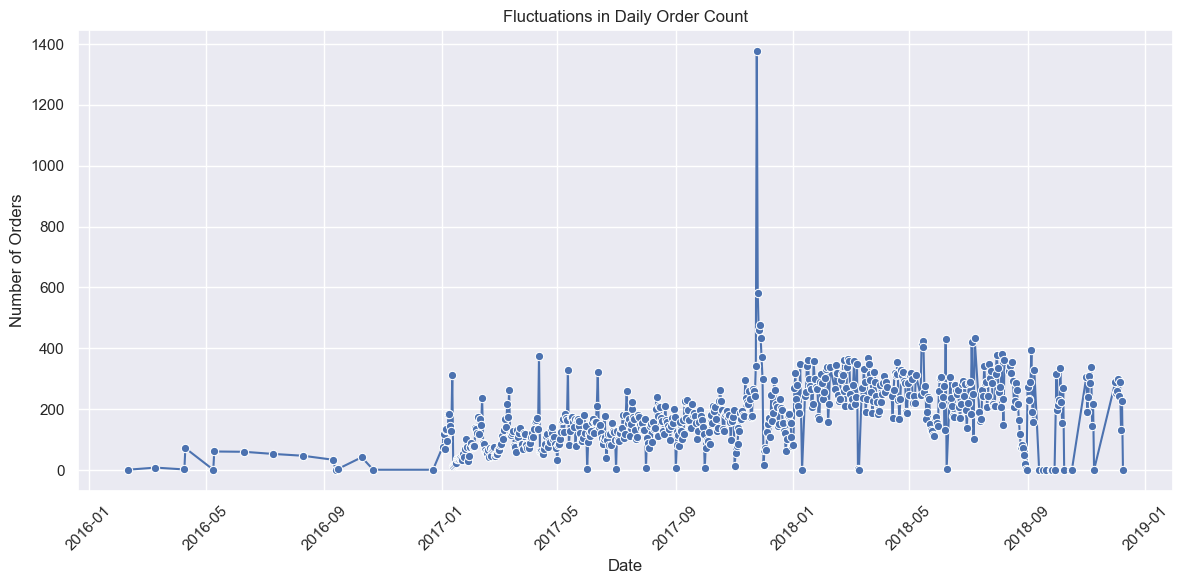

In [23]:
# Convert order_purchase_timestamp to datetime
df=Streaming_DataSet
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract date from order_purchase_timestamp
df['order_date'] = df['order_purchase_timestamp'].dt.date

# Group by order_date and calculate the number of orders
daily_orders = df.groupby('order_date')['order_id'].count().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_orders, x='order_date', y='order_id', marker='o')
plt.title("Fluctuations in Daily Order Count")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Convert 'order_purchase_timestamp' to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%d-%m-%y %H:%M')

# Extract the hour and day of the week from the timestamp
df['order_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_day'] = df['order_purchase_timestamp'].dt.day_name()

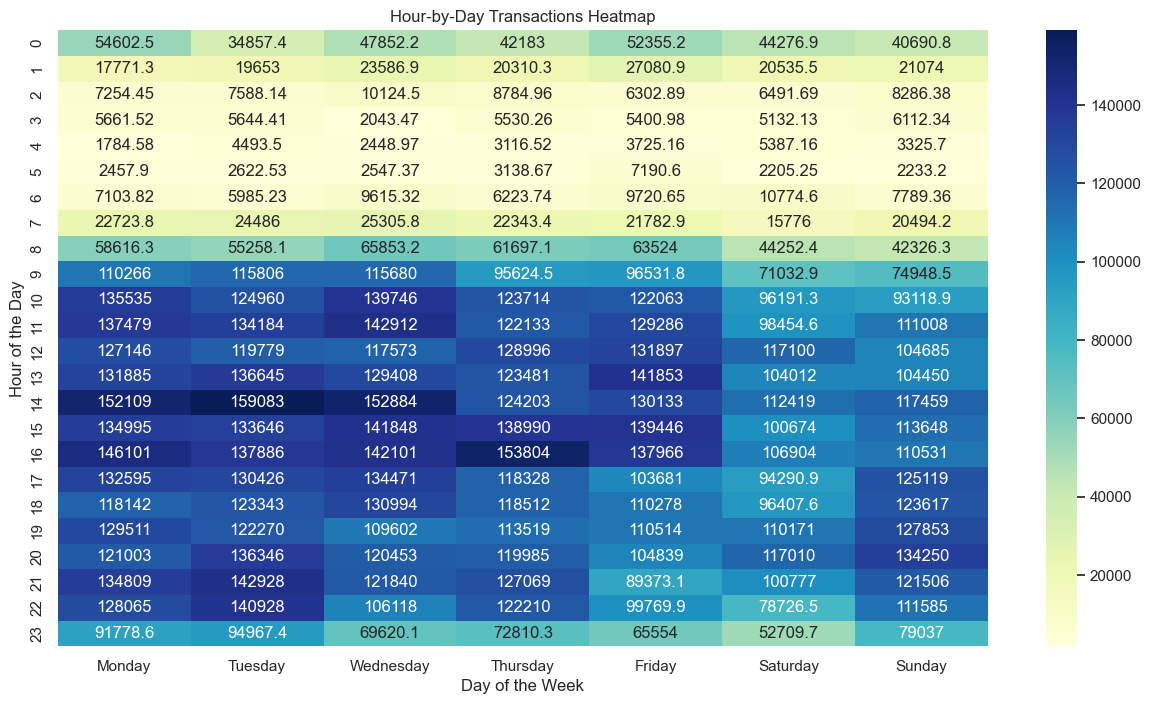

In [25]:
# Create a pivot table for heatmap
pivot_table = df.pivot_table(index='order_hour', columns='order_day', values='price', aggfunc='sum')

# Order the days of the week for proper heatmap display
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order, axis=1)

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Hour-by-Day Transactions Heatmap")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()

> The heatmap indiciates that the majority of the transactions occur during office hours till 11PM . We can thus increases our marketing strategies during this period.

In [29]:
# Clean and convert 'price' column to numeric and handle NaN values
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group data by state and calculate total sales
state_sales = df.groupby('customer_state')['price'].sum().reset_index()

# Sort states by total sales in descending order
state_sales = state_sales.sort_values(by='price', ascending=False)

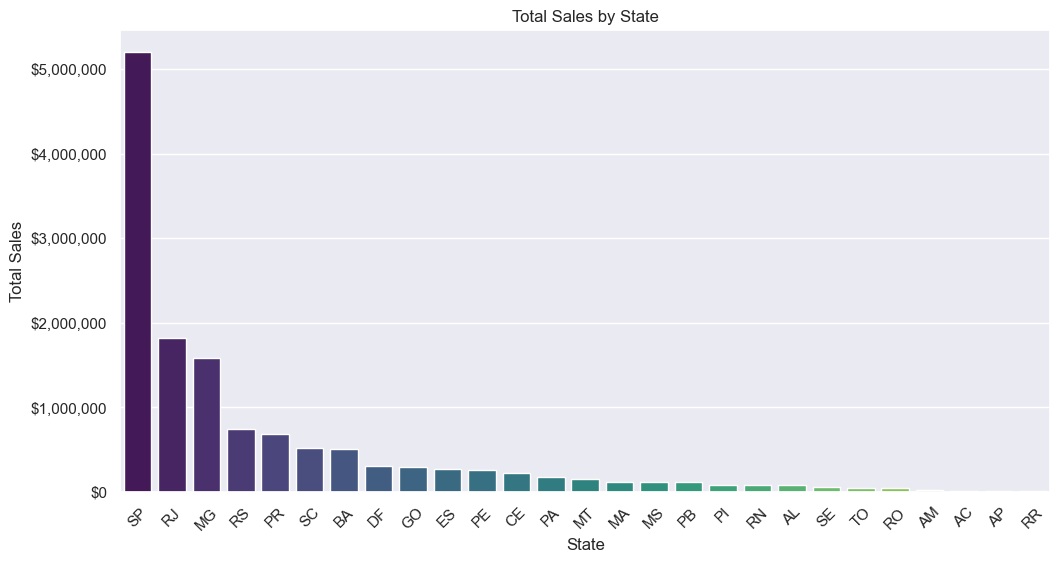

In [30]:
# Create a bar plot with sales amounts as y-axis labels
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=state_sales, x='customer_state', y='price', palette='viridis')

# Define a formatter function to display sales amounts with currency symbol
def currency_format(x, pos):
    return f"${x:,.0f}"  

# Apply the custom formatter to the y-axis ticks
ax.yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Show the shopping patterns of olist customers.

In [34]:
#converting in data and time datatyoe and getting out day name for visulaization
olist_orders_df['order_delivered_customer_date'] =  pd.to_datetime(olist_orders_df['order_delivered_customer_date'], format ="%d-%m-%Y %H:%M")
olist_orders_df['order_purchase_timestamp'] =  pd.to_datetime(olist_orders_df['order_purchase_timestamp'], format ="%d-%m-%Y %H:%M")
olist_orders_df['order_approved_at'] =  pd.to_datetime(olist_orders_df['order_approved_at'], format ="%d-%m-%Y %H:%M")
olist_orders_df['order_estimated_delivery_date'] =  pd.to_datetime(olist_orders_df['order_estimated_delivery_date'], format ="%d-%m-%Y %H:%M")
olist_orders_df['order_delivered_carrier_date'] =  pd.to_datetime(olist_orders_df['order_delivered_carrier_date'], format ="%d-%m-%Y %H:%M")

olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [35]:
graph1 = olist_orders_df['order_purchase_timestamp'].dt.day_name().value_counts()
graph2 = olist_orders_df['order_approved_at'].dt.day_name().value_counts()
graph3 = olist_orders_df['order_delivered_customer_date'].dt.day_name().value_counts()
graph4 = olist_orders_df['order_estimated_delivery_date'].dt.day_name().value_counts()

In [36]:
#plotting all subplots 
f1 = px.bar(x=graph1.index,y=graph1.values)
f2= px.bar(x=graph2.index,y=graph2.values)
f3= px.bar(x=graph3.index,y=graph3.values)
f4= px.bar(x=graph4.index,y=graph4.values)

In [49]:
#getting the traces out of it.
trace1 = f1['data'][0]
trace3 = f2['data'][0]
trace2 = f3['data'][0]
trace4 = f4['data'][0]

In [50]:
#making a subplot having two rows and two columns.
fig = make_subplots(rows = 2, cols =2 , shared_xaxes = False,subplot_titles=("Order Purchase ", "Order Approved ","Order Delivery ", "Order Estimated Delivery "))

In [51]:
#adding traces in the figure
fig.add_trace(trace1, row = 1, col = 1)
fig.add_trace(trace2, row = 2, col = 1)
fig.add_trace(trace3, row = 1, col = 2)
fig.add_trace(trace4, row = 2, col = 2)
fig.update_layout(height=800, width=800, title_text="Stacked Subplots",plot_bgcolor='#F5FFFA')

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text='Count')

fig.show()

Insights

*   `Order purchase` -graph shows us that online shopping has be done throught the week days rather than weekend as it required minimal effort.

*   `Order Approved` -graph shows us the at what days order got approved on olist and by comparing them with first graph we can conclude that on **Mondays** most people buy there stuff and it got approved on very next day on **Tuesday** which can be seen in second graph.

*   `Order Delivery` -graph shows us the day of delivery and near about **19k** orders get delivered on first day of week while just **7000** items get delivered on weekends.

*   `Order Estimated delivery` -this graph shows us that **Olist e-commerce** skips to give estimated delivery on weekends as weekend tends to be resting day they prefer not to disturb there customers.



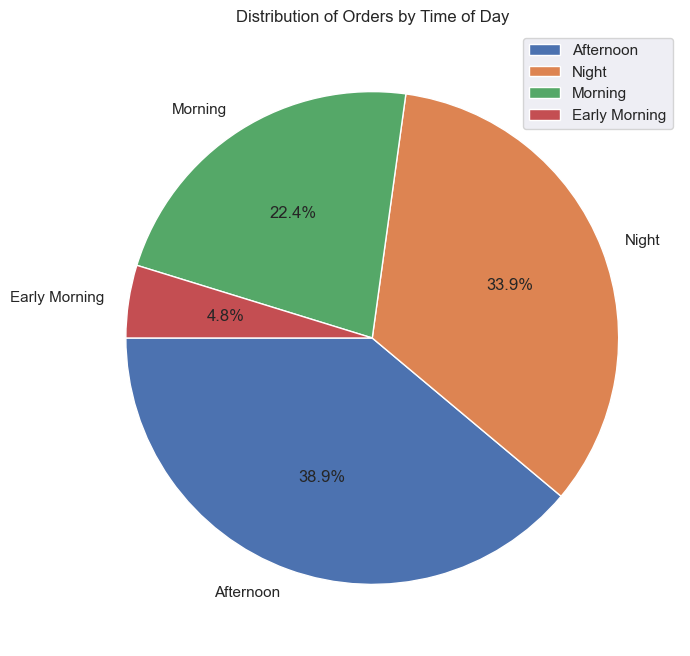

In [30]:
# Create categories for different times of the day
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

# Categorize hours into time slots
df['time_slot'] = df['order_hour'].apply(categorize_time)

# Count the occurrences of each time slot
time_slot_count = df['time_slot'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.title('Distribution of Orders by Time of Day')
plt.pie(time_slot_count, labels=time_slot_count.index, autopct='%1.1f%%', startangle=180)
plt.legend(time_slot_count.index, loc="best")
plt.show()


* As we can see from the pie chart that olist recieves most of the orders at afternoon touching nearly 40% and least at early morning which is pratically true.

### CONCLUSION
* We have gone trough a extensive journey for understanding the data and plotting some useful charts to clarify the concepts and get insights from data.

* Credict card is most used for payments in olist which is true because credit card company provides most amount of offers for there customers.

* There are 74 different cateogry present in olist from where Brazilians can shop.

* It seems transportation cost(freight value) in olist is reasonable getting max upto 70 brazilian real.

* olist has nearly 97% successful delivery rate which shows there commitment towards the order and making this amount of successful deliveries will help them grow in near future.

### FUTURE WORK
* In near future we can look at all the reviews and comments and will try to analyze what people thinks about olist store.

* We can also use this dataset to map differently on graph as we have geo location of every pincode we can explore more into it.

* One more thing we can do is to list pricing of the products and tends to compare it with freight values which will be nect step to analyze transportation costs.

* Last but not the least we can try for a new olist dataset and comparing it will give us result whether its truly a geniune datset.